In [1]:
from transit_periodogram import transit_periodogram
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import KeplerTargetPixelFile

# Demo of the LightKurve Package, courtesy of NASA's Kepler GO Team

---
### Import a .fits image from MAST Archive

In [3]:
tpf = KeplerTargetPixelFile.from_archive("8191673", quarter=1)

INFO: Found cached file ./mastDownload/Kepler/kplr008191673_lc_Q011100111111111111/kplr008191673-2009166043257_lpd-targ.fits.gz with expected size 534450. [astroquery.query]


---
### Or you could import a .fits image (or multiple) from your machine

In [4]:
tpf1 = KeplerTargetPixelFile.from_fits_images(["kplr002421529-2009259160929_llc.fits",
                                              "kplr002421529-2010265121752_llc.fits",
                                              "kplr002421529-2011271113734_llc.fits",
                                              "kplr002421529-2012277125453_llc.fits"])

In [5]:
#%matplotlib inline
#tpf.plot(scale="log")
#light = tpf.to_lightcurve()
#light.plot();

---
### View the .fits file directly as a TargetPixelFile

/anaconda3/lib/python3.6/site-packages/astropy/visualization/stretch.py:267: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


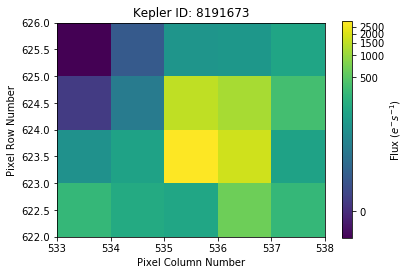

In [6]:
%matplotlib inline
tpf.plot(scale='log');

----
### Extract the Light Curve data from the TargetPixelFile

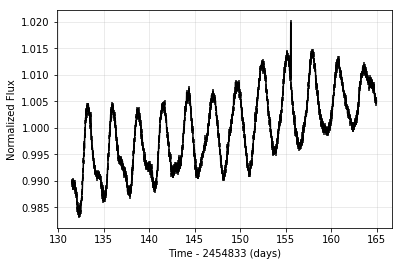

In [7]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot();

---
### Flatten the Light Curve and correct trends

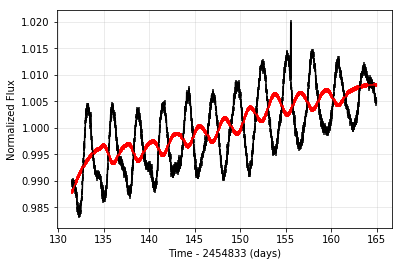

In [8]:
flat, trend = lc.flatten(window_length=301, return_trend=True)
ax = lc.plot()                         #plot() returns a matplotlib axis
trend.plot(ax, color='red');           #which we can pass to the next plot() to use the same plotting window

---
### Flattened light curves look like this:

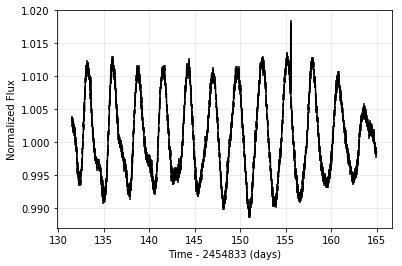

In [9]:
flat.plot();

---
### Export the Light Curve data directly to a pandas DataFrame

In [10]:
flat.to_pandas()

/Users/kaitlin/lightkurve/lightkurve/lightcurve.py:561: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.meta = self.meta


,time,flux,flux_err,quality,centroid_col,centroid_row
time,,,,,,
131.511782,131.511782,1.002615,0.000419,0,535.853509,623.820789
131.532217,131.532217,1.002656,0.000419,0,535.853269,623.821303
131.552652,131.552652,1.001872,0.000419,0,535.853243,623.820608
131.573086,131.573086,1.001912,0.000419,0,535.852875,623.820902
131.593521,131.593521,1.001158,0.000419,0,535.853369,623.820926
131.613955,131.613955,1.000989,0.000419,0,535.853648,623.820791
131.634390,131.634390,1.001072,0.000419,0,535.853498,623.820769
131.654824,131.654824,1.002349,0.000419,0,535.854276,623.821196
131.675259,131.675259,1.001528,0.000418,0,535.853337,623.821226


---
### Use the Transit Periodogram to find the best periodicity measurement

In [11]:
periods = np.arange(0.3, 1.5, 0.0001)
durations = np.arange(0.005, 0.15, 0.001)
power, _, _, _, _, _, _ = transit_periodogram(time=flat.time,
                                              flux=flat.flux,
                                              flux_err=flat.flux_err,
                                              periods=periods,
                                              durations=durations)
best_fit = periods[np.argmax(power)]
print('Best Fit Period: {} days'.format(best_fit))

Best Fit Period: 0.308799999999999 days


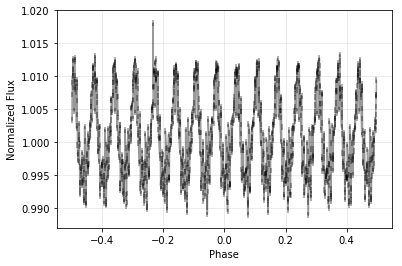

In [12]:
flat.fold(best_fit).plot(alpha=0.4);